In [79]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

In [80]:
def padronizar_normal(matriz_X):
    for i in range(np.shape(matriz_X)[1]):
        matriz_X[:,i] = (matriz_X[:,i] - np.mean(matriz_X[:,i]))/np.std(matriz_X[:,i]) # X menos media/desvio padrao

    return matriz_X

def normalizar(X):
    min_values = X.min(axis=0)
    max_values = X.max(axis=0)
    X = (X - min_values) / (max_values - min_values)
    return X


In [81]:
"""dataframe_original = pd.read_csv('creditcard.csv')
print("Dimensões do dataframe: ",dataframe_original.shape)
print("Quantidades de cada classe:", dataframe_original['Class'].value_counts())
# Reduzindo a quantidade de amostras para 10000 da classe 0 e todas da classe 1
dataframe_original = dataframe_original.sample(frac=1) # embaralhando as amostras
fraude = dataframe_original.loc[dataframe_original['Class'] == 1]
nao_fraude = dataframe_original.loc[dataframe_original['Class'] == 0][:10000]
dataframe_reduzido = pd.concat([fraude, nao_fraude])
dataframe_reduzido.to_csv('creditcard_reduced.csv', index=False)"""

'dataframe_original = pd.read_csv(\'creditcard.csv\')\nprint("Dimensões do dataframe: ",dataframe_original.shape)\nprint("Quantidades de cada classe:", dataframe_original[\'Class\'].value_counts())\n# Reduzindo a quantidade de amostras para 10000 da classe 0 e todas da classe 1\ndataframe_original = dataframe_original.sample(frac=1) # embaralhando as amostras\nfraude = dataframe_original.loc[dataframe_original[\'Class\'] == 1]\nnao_fraude = dataframe_original.loc[dataframe_original[\'Class\'] == 0][:10000]\ndataframe_reduzido = pd.concat([fraude, nao_fraude])\ndataframe_reduzido.to_csv(\'creditcard_reduced.csv\', index=False)'

In [82]:
data = pd.read_csv('creditcard_reduced.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1,62080.0,-1.599457,2.607720,-2.987193,3.064156,-2.497914,-0.541103,-2.277786,1.268166,-1.997331,...,0.662933,0.184087,-0.089452,-0.506000,-0.062259,-0.052714,0.322854,0.135268,180.00,1
2,149096.0,1.184891,3.152084,-6.134780,5.531252,1.733867,-1.816861,-0.916696,0.265568,-3.158014,...,0.124236,-0.823865,-0.079887,0.028828,0.389711,0.060171,0.485187,0.326552,0.00,1
3,93860.0,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,...,2.715357,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,188.52,1
4,102622.0,-2.877176,4.569649,-9.553069,4.441079,-3.653961,-1.877981,-3.514353,1.547608,-2.503304,...,1.272896,1.300268,-0.003950,-0.360848,-0.597526,-0.390901,0.592197,-0.241010,346.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,29135.0,1.148470,-0.226385,-1.378984,-0.501250,2.115918,3.156576,-0.191150,0.725852,-0.240172,...,-0.497682,-1.855851,0.146490,0.960612,0.220649,-0.123232,-0.058349,0.027293,94.31,0
10488,161456.0,0.098372,0.881126,-0.412761,-0.501913,0.817211,-0.925919,0.864430,-0.038913,0.142891,...,-0.346648,-0.932954,0.134695,0.594512,-0.465915,0.113468,0.211053,0.083482,6.45,0
10489,20259.0,-0.230903,0.188957,1.950648,-1.682032,-0.491241,0.442542,-0.611728,-0.566704,2.466857,...,0.615393,-0.317370,-0.344081,-0.355076,1.492861,-0.662246,0.117670,0.129243,11.85,0
10490,32140.0,-0.818437,0.592785,0.468012,-0.279240,1.401790,-1.316362,0.647986,-0.015513,-0.784337,...,0.056923,-0.071114,-0.134238,-0.112990,-0.167753,0.148682,0.057840,0.164770,0.76,0


In [83]:
data = data.drop(['Time'], axis=1)
print(data['Class'].value_counts())
# Eu possuo 100 valores de classe 0 e 492 valores de classe 1. Deixando os valores iguals, 492 em cada classe
data = data.sample(frac=1)
fraude = data.loc[data['Class'] == 1]
nao_fraude = data.loc[data['Class'] == 0][:492]
normal_distributed_data = pd.concat([fraude, nao_fraude])
print(normal_distributed_data['Class'].value_counts())


Class
0    10000
1      492
Name: count, dtype: int64
Class
1    492
0    492
Name: count, dtype: int64


In [84]:
normal_distributed_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
28,-7.139060,2.773082,-6.757845,4.446456,-5.464428,-1.713401,-6.485365,3.409395,-3.053493,-6.260706,...,1.303250,-0.016118,-0.876670,0.382230,-1.054624,-0.614606,-0.766848,0.409424,106.90,1
443,-12.224021,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,-11.201400,...,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1218.89,1
346,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,-3.926510,...,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,3.90,1
370,-1.073820,0.415616,-2.273977,1.536844,-0.758697,-1.670381,-2.377140,0.090370,0.004847,-2.776747,...,0.535542,0.863592,0.450743,-0.144228,-0.205609,-0.539073,0.503418,-0.237807,11.00,1
150,-0.443794,1.271395,1.206178,0.790371,0.418935,-0.848376,0.917691,-0.235511,-0.285692,-0.867900,...,0.119279,0.513479,-0.264243,0.443311,0.029516,-0.335141,-0.188815,-0.123391,5.09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9656,-3.476503,-2.665062,0.706209,0.318568,2.550433,-2.365024,-1.214728,0.682943,-0.481255,-0.765727,...,0.388343,-0.275835,-0.374342,0.058392,0.330986,0.364746,-0.068066,-0.553839,0.00,0
2107,-1.135786,-1.748475,1.364108,-3.058091,0.389872,0.796766,-0.913720,0.698954,-2.189878,0.551349,...,0.056080,0.116537,0.637272,-1.120866,-1.120106,-0.741473,0.180015,0.184281,92.00,0
8934,-0.817846,0.444560,0.427881,-1.823951,0.001090,-0.473441,0.259687,0.247719,-1.861711,-0.245749,...,0.495346,1.087200,-0.497737,0.540085,1.021973,0.264777,-0.135318,-0.033824,45.85,0
1358,-1.899412,-0.835026,1.667931,-0.646436,1.525271,1.133794,-0.310950,0.638651,-0.195195,-0.602018,...,-0.104950,-0.138522,0.613933,-1.651364,0.106802,0.628332,-0.004720,0.026507,25.30,0


In [85]:
X = np.array(normal_distributed_data.drop('Class', axis=1))
Y = np.array(normal_distributed_data['Class'])
RANDOM_STATE = 2
BATCH_SIZE = 32

# Normalizando os dados
X = padronizar_normal(X) # Nesse caso, utilizaremos a padronização dos dados, pois a escala dos dados é importante para o treinamento da rede neural

In [86]:
# Separando em dados de treino, teste e validação
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train, Y_train, test_size=0.2, random_state=RANDOM_STATE)

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)


X_train: (629, 29)
Y_train: (629,)
X_val: (158, 29)
Y_val: (158,)


In [87]:
# Encontrando o número de neurônios na camada escondida
num_neuronios = (X_train.shape[0] - 10)/(10*(X_train.shape[1] + 2))
num_neuronios

1.9967741935483871

c:\Users\Bergson\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8852 - loss: 0.6840 - val_accuracy: 0.8730 - val_loss: 0.6772
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8610 - loss: 0.6736 - val_accuracy: 0.8651 - val_loss: 0.6638
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8619 - loss: 0.6574 - val_accuracy: 0.8651 - val_loss: 0.6459
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8782 - loss: 0.6363 - val_accuracy: 0.8651 - val_loss: 0.6240
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8860 - loss: 0.6104 - val_accuracy: 0.8651 - val_loss: 0.5989
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8798 - loss: 0.5820 - val_accuracy: 0.8730 - val_loss: 0.5722
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8929 - loss: 0.5566 - val_accuracy: 0.8730 - val_loss: 0.5454
Epoch 8/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9001 - loss: 0.5194 - val_accuracy: 0.8730 - 

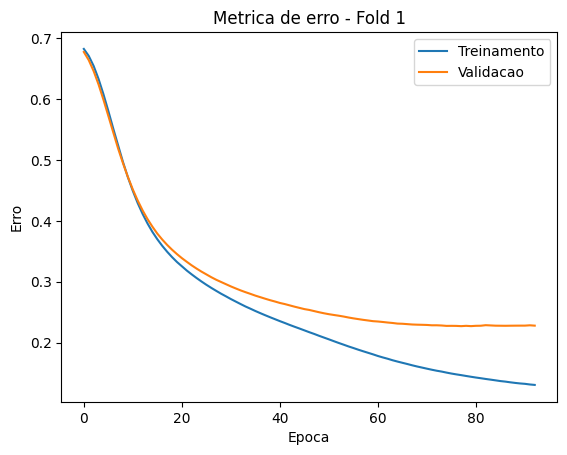

--> Acuracia (treino): 0.9583
--> Acuracia (validacao): 0.9127
--> Ein - Eval = 0.0456
--> val_loss - train_loss = 0.0973

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6317 - loss: 0.6918 - val_accuracy: 0.7381 - val_loss: 0.6886
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8186 - loss: 0.6866 - val_accuracy: 0.8571 - val_loss: 0.6811
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8364 - loss: 0.6792 - val_accuracy: 0.8968 - val_loss: 0.6682
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8666 - loss: 0.6647 - val_accuracy: 0.8968 - val_loss: 0.6453
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8756 - loss: 0.6427 - val_accuracy: 0.8889 - val_loss: 0.6137
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8561 - loss: 0.6151 - val_accuracy: 0.8889 - val_loss: 0.5780
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8788 - loss: 0.5786 - val_accuracy: 0.8968 - val_

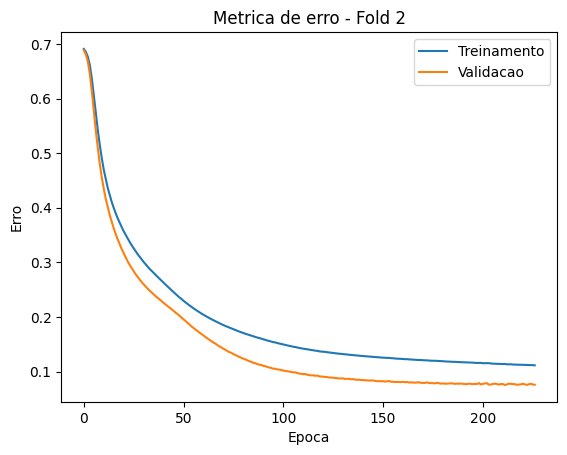

--> Acuracia (treino): 0.9602
--> Acuracia (validacao): 0.9841
--> Ein - Eval = -0.0239
--> val_loss - train_loss = -0.0356

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7699 - loss: 0.6893 - val_accuracy: 0.7937 - val_loss: 0.6848
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8384 - loss: 0.6809 - val_accuracy: 0.8413 - val_loss: 0.6733
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8633 - loss: 0.6666 - val_accuracy: 0.8492 - val_loss: 0.6548
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8627 - loss: 0.6457 - val_accuracy: 0.8413 - val_loss: 0.6306
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8776 - loss: 0.6214 - val_accuracy: 0.8333 - val_loss: 0.6028
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8834 - loss: 0.5852 - val_accuracy: 0.8413 - val_loss: 0.5733
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9048 - loss: 0.5473 - val_accuracy: 0.8413 - va

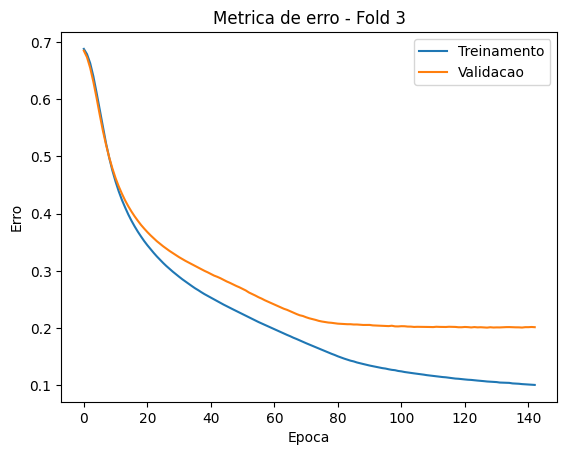

--> Acuracia (treino): 0.9622
--> Acuracia (validacao): 0.9365
--> Ein - Eval = 0.0257
--> val_loss - train_loss = 0.1009

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4837 - loss: 0.6927 - val_accuracy: 0.7619 - val_loss: 0.6863
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7325 - loss: 0.6853 - val_accuracy: 0.8254 - val_loss: 0.6733
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8458 - loss: 0.6704 - val_accuracy: 0.8571 - val_loss: 0.6527
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8358 - loss: 0.6509 - val_accuracy: 0.8571 - val_loss: 0.6259
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8595 - loss: 0.6250 - val_accuracy: 0.8651 - val_loss: 0.5947
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8717 - loss: 0.5891 - val_accuracy: 0.8730 - val_loss: 0.5614
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8642 - loss: 0.5684 - val_accuracy: 0.8889 - val_

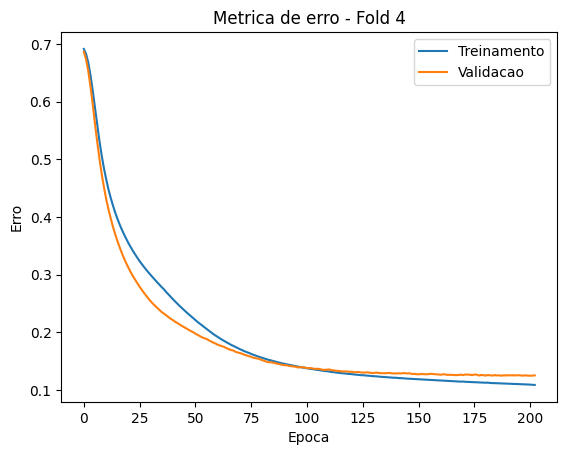

--> Acuracia (treino): 0.9602
--> Acuracia (validacao): 0.9524
--> Ein - Eval = 0.0079
--> val_loss - train_loss = 0.0166

Epoch 1/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7073 - loss: 0.6903 - val_accuracy: 0.8080 - val_loss: 0.6837
Epoch 2/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8454 - loss: 0.6805 - val_accuracy: 0.8160 - val_loss: 0.6701
Epoch 3/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8799 - loss: 0.6635 - val_accuracy: 0.8400 - val_loss: 0.6506
Epoch 4/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8815 - loss: 0.6407 - val_accuracy: 0.8320 - val_loss: 0.6264
Epoch 5/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8714 - loss: 0.6150 - val_accuracy: 0.8320 - val_loss: 0.5996
Epoch 6/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8818 - loss: 0.5797 - val_accuracy: 0.8320 - val_loss: 0.5725
Epoch 7/250
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8955 - loss: 0.5458 - val_accuracy: 0.8400 - val_

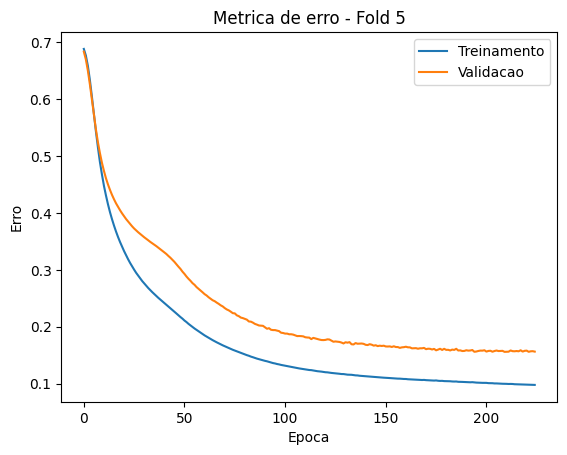

--> Acuracia (treino): 0.9663
--> Acuracia (validacao): 0.9120
--> Ein - Eval = 0.0543
--> val_loss - train_loss = 0.0585



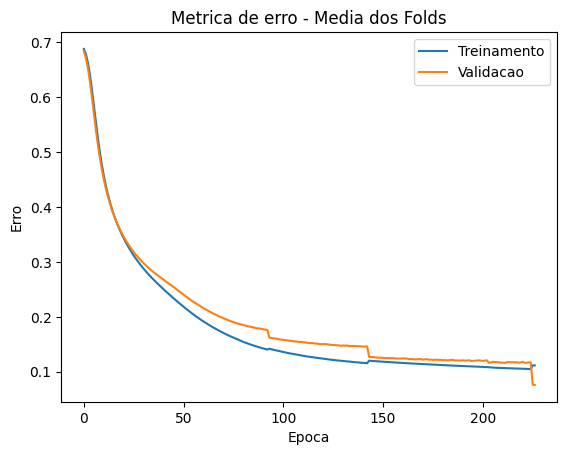

--> Acuracia media (treino): 0.9614
--> Acuracia media (validacao): 0.9395
--> acc_in - acc_val = 0.0219
--> loss medio do treino = 0.1815
--> loss medio da validacao = 0.1968
--> val_loss - train_loss = 0.0152



In [88]:
# Introduzindo o k-fold, com k=5
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
accuracies_train = []
accuracies_val = []
history_list = []
tamanho_history_history_loss_list = []
i = 0
for index_treino, index_val in kfold.split(X_train, Y_train):
    i += 1
    X_train_fold, X_val_fold = X_train[index_treino], X_train[index_val]
    Y_train_fold, Y_val_fold = Y_train[index_treino], Y_train[index_val]

    # Criando a rede neural
    model = Sequential()
    # Adicionando neurônios em uma camada oculta
    model.add(Dense(2, input_dim=29, kernel_initializer='normal', activation='selu')) #quantidade de neuronios na camada escondida, nº de features (selu, relu, gelu)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) #camada de saída

    # adicionando a taxa de aprendizado
    learning_rate = 0.001  

    # Criando um otimizador Adam com a taxa de aprendizado desejada
    otimizador = optimizers.Adam(learning_rate=learning_rate)

    # Adicionando uma condição de parada antecipada
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

    # Compilando o modelo
    model.compile(loss = 'binary_crossentropy', optimizer = otimizador, metrics = ['accuracy'])

    #Treinando o modelo
    history = model.fit(X_train_fold, Y_train_fold, validation_data=(X_val_fold, Y_val_fold), epochs=250, batch_size=BATCH_SIZE, verbose=1, callbacks=[es])
    history_list.append(history)
    tamanho_history_history_loss_list.append(len(history.history['loss']))

    # Avalia o modelo
    _, accuracy_train = model.evaluate(X_train_fold, Y_train_fold, batch_size=BATCH_SIZE, verbose=0)
    _, accuracy_val = model.evaluate(X_val_fold, Y_val_fold, batch_size=BATCH_SIZE, verbose=0)
    accuracies_train.append(accuracy_train)
    accuracies_val.append(accuracy_val)

    # Exibe o historico de treinamento para um fold especifico
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Metrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Epoca')
    plt.legend(['Treinamento', 'Validacao'])
    plt.show()

    print(f'--> Acuracia (treino): {accuracy_train:.4f}')
    print(f'--> Acuracia (validacao): {accuracy_val:.4f}')
    print(f"--> Ein - Eval = {accuracy_train - accuracy_val:.4f}") 
    print(f"--> val_loss - train_loss = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}\n")
       

# Calcula a acuracia media
acuracia_media_treino = np.mean(accuracies_train)
acuracia_media_validacao = np.mean(accuracies_val)

# Historico com valores medios dos folds
history_train_loss_avg_list = []
history_val_losso_avg_list = []

for epoca in range(max(tamanho_history_history_loss_list)):
    list_valores_loss_train = []
    list_valores_loss_val = []
    for j in range(len(history_list)):
        if epoca < len(history_list[j].history['loss']): # verifica se a epoca existe no historico do fold j por causa do early stopping
            list_valores_loss_train.append(history_list[j].history['loss'][epoca])
            list_valores_loss_val.append(history_list[j].history['val_loss'][epoca])
    history_train_loss_avg_list.append(np.mean(list_valores_loss_train)) # Calcula a média dos valores de loss para cada epoca (media da epoca 1, media da epoca 2...)
    history_val_losso_avg_list.append(np.mean(list_valores_loss_val))                           

loss_medio_treino = np.mean(history_train_loss_avg_list)
loss_medio_val = np.mean(history_val_losso_avg_list)

plt.plot(history_train_loss_avg_list)
plt.plot(history_val_losso_avg_list)
plt.title('Metrica de erro - Media dos Folds')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

print(f'--> Acuracia media (treino): {acuracia_media_treino:.4f}')
print(f'--> Acuracia media (validacao): {acuracia_media_validacao:.4f}')
print(f"--> acc_in - acc_val = {acuracia_media_treino - acuracia_media_validacao:.4f}")
print(f"--> loss medio do treino = {loss_medio_treino:.4f}")
print(f"--> loss medio da validacao = {loss_medio_val:.4f}")  
print(f"--> val_loss - train_loss = {(loss_medio_val - loss_medio_treino):.4f}\n")


# Criando a rede neural com os hiperparâmetros escolhidos

- Número de neurônios na camada escondida = 2
- Função de ativação da camada escondida = selu
- Função de ativação da camada de saída = sigmoid
- Otimizador = adam (learning rate padrão, 0.001)
- Early Stopping com 15 épocas de paciência
- 250 épocas de treinamento

In [89]:
# Criando a rede neural
model = Sequential()
# Adicionando as camadas e os neurônios em cada camada
model.add(Dense(2, input_dim=29, kernel_initializer='normal', activation='selu')) #quantidade de neuronios na camada escondida, nº de features
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) #camada de saída

# Taxa de aprendizado do otimizador
learning_rate = 0.001

# Criando um otimizador Adam com a taxa de aprendizado
otimizador = optimizers.Adam(learning_rate=learning_rate)

# Adicionando uma condição de parada Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

# Compilando o modelo
model.compile(loss = 'binary_crossentropy', optimizer = otimizador, metrics = ['accuracy'])



In [90]:
# Treinando o modelo
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=250, batch_size=BATCH_SIZE, verbose=1, callbacks=[es])

Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5812 - loss: 0.6918 - val_accuracy: 0.8038 - val_loss: 0.6839
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8478 - loss: 0.6786 - val_accuracy: 0.8481 - val_loss: 0.6645
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8481 - loss: 0.6560 - val_accuracy: 0.8544 - val_loss: 0.6351
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8542 - loss: 0.6232 - val_accuracy: 0.8608 - val_loss: 0.5990
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8361 - loss: 0.5964 - val_accuracy: 0.8608 - val_loss: 0.5613
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8637 - loss: 0.5489 - val_accuracy: 0.8608 - val_loss: 0.5250
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8860 - loss: 0.5108 - val_accuracy: 0.8608 - val_loss: 0.4945
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8865 - loss: 0.4796 - val_accuracy: 0.8608 - 

--> Acuracia (treino): 0.9618
--> Acuracia (validacao): 0.9304
--> Ein - Eval = 0.0315
--> val_loss - train_loss = 0.0913



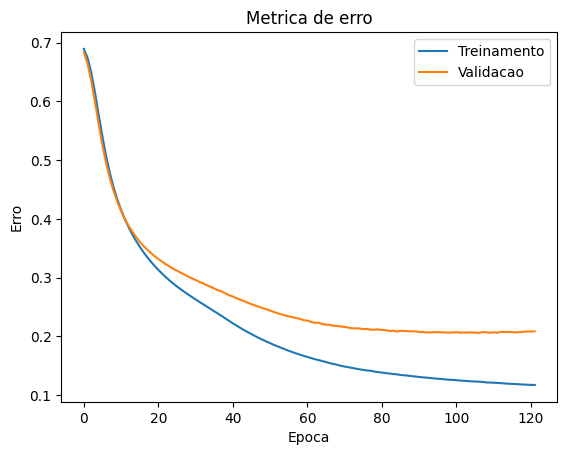

In [91]:
# Calculando a acuracia
_, accuracy_train = model.evaluate(X_train, Y_train, batch_size=BATCH_SIZE, verbose=0)
_, accuracy_val = model.evaluate(X_val, Y_val, batch_size=BATCH_SIZE, verbose=0)

# Plotando os resultados
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])


print(f'--> Acuracia (treino): {accuracy_train:.4f}')
print(f'--> Acuracia (validacao): {accuracy_val:.4f}')
print(f"--> Ein - Eval = {accuracy_train - accuracy_val:.4f}") 
print(f"--> val_loss - train_loss = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}\n")


In [92]:
# Avaliando o modelo com o classification report
Y_pred_train = np.round(model.predict(X_train))
print('Classification Report (treino):')
print(classification_report(Y_train, Y_pred_train))


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report (treino):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       312
           1       0.99      0.93      0.96       317

    accuracy                           0.96       629
   macro avg       0.96      0.96      0.96       629
weighted avg       0.96      0.96      0.96       629



In [93]:
Y_pred_val = np.round(model.predict(X_val))
print('Classification Report (validacao):')
print(classification_report(Y_val, Y_pred_val))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Classification Report (validacao):
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        78
           1       0.97      0.89      0.93        80

    accuracy                           0.93       158
   macro avg       0.93      0.93      0.93       158
weighted avg       0.93      0.93      0.93       158

